In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys

sys.path.append("../")
from plotting import *

In [2]:
import seaborn as sns

In [83]:
image_file_dir = "/analysis/fabiane/documents/publications/MS_CNN_VIS"

# Normalized values

In [3]:
path = "/analysis/ritter/projects/MS/interm_results"
normal_scans_norm = pd.read_csv(os.path.join(path, "evidence_in_area-normalized-TP-normal_images.csv"))
lesions_removed_norm = pd.read_csv(os.path.join(path, "evidence_in_area-normalized-TP-lesions_removed.csv"))

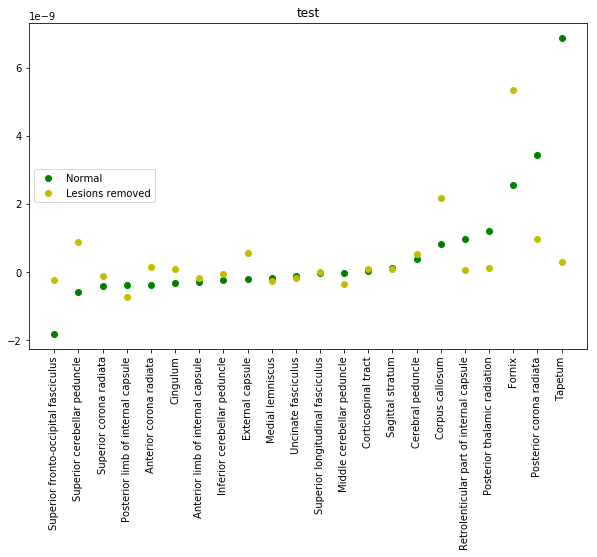

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(normal_scans_norm['area'], normal_scans_norm['relevance'], 'go', label="Normal")
plt.plot(lesions_removed_norm['area'], lesions_removed_norm['relevance'], 'yo', label="Lesions removed")
plt.xticks(rotation='vertical')
plt.legend(loc="center left")
plt.title("test")
plt.show()

In [6]:
df_norm = pd.merge(normal_scans_norm, lesions_removed_norm, left_on='area',right_on='area',how='outer', suffixes=('_normal_scans', '_lesions_removed'))

In [7]:
df_norm = df_norm[::-1]

/home/fabiane/anaconda2/envs/postal/lib/python3.6/site-packages/matplotlib/figure.py:2362: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


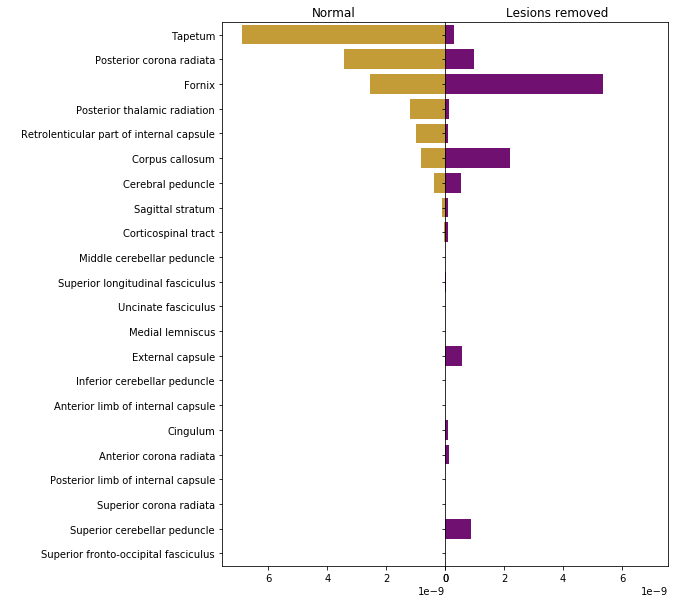

In [8]:
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(8, 10),
                         gridspec_kw = {'wspace':0, 'hspace':10.})
sns.barplot(y=df_norm['area'], x=df_norm['relevance_normal_scans'], color='goldenrod', ax=axes[0])
#axes[0].invert_xaxis()
#axes[0].invert_yaxis()
axes[0].set_xlabel(' ')
axes[0].set_ylabel(' ')
axes[0].set_xlim(np.max(df_norm['relevance_normal_scans'])*1.1, 0)
axes[0].set_title("Normal")


sns.barplot(y=df_norm['area'], x=df_norm['relevance_lesions_removed'], color='purple', ax=axes[1])
axes[1].set_xlabel(' ')
axes[1].set_ylabel(' ')
axes[1].set_xlim(0, np.max(df_norm['relevance_normal_scans'])*1.1)
axes[1].set_title("Lesions removed")

plt.tight_layout()
plt.show()

Drop based on least sum

In [13]:
# get order based on relevance sum
order = (df_norm["relevance_normal_scans"] + df_norm["relevance_lesions_removed"]).sort_values().index

In [14]:
# take top 15
short_df_norm = df_norm.drop(order[:7])

/home/fabiane/anaconda2/envs/postal/lib/python3.6/site-packages/matplotlib/figure.py:2362: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


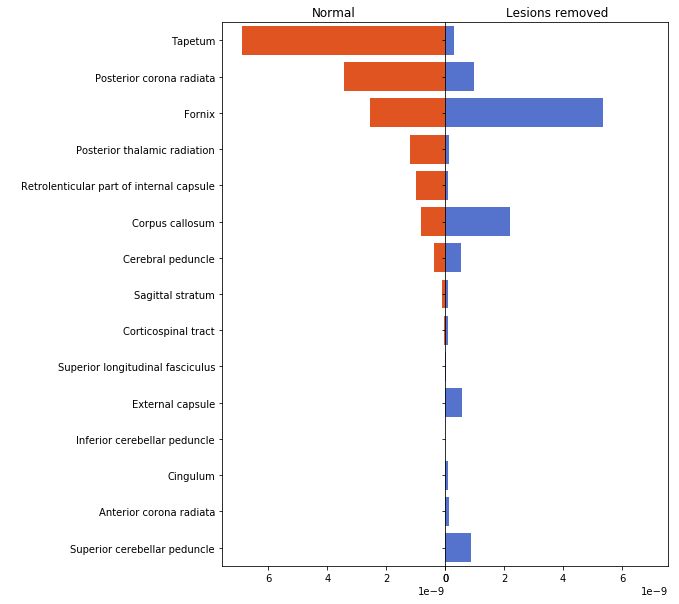

In [15]:
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(8, 10),
                         gridspec_kw = {'wspace':0, 'hspace':10.})
sns.barplot(y=short_df_norm['area'], x=short_df_norm['relevance_normal_scans'], color='orangered', ax=axes[0])
axes[0].set_xlabel(' ')
axes[0].set_ylabel(' ')
axes[0].set_xlim(np.max(short_df_norm['relevance_normal_scans'])*1.1, 0)
axes[0].set_title("Normal")


sns.barplot(y=short_df_norm['area'], x=short_df_norm['relevance_lesions_removed'], color='royalblue', ax=axes[1])
axes[1].set_xlabel(' ')
axes[1].set_ylabel(' ')
axes[1].set_xlim(0, np.max(short_df_norm['relevance_normal_scans'])*1.1)
axes[1].set_title("Lesions removed")

plt.tight_layout()
plt.show()

In [16]:
# take top 10
short_df_norm = df_norm.drop(order[:12])

/home/fabiane/anaconda2/envs/postal/lib/python3.6/site-packages/matplotlib/figure.py:2362: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


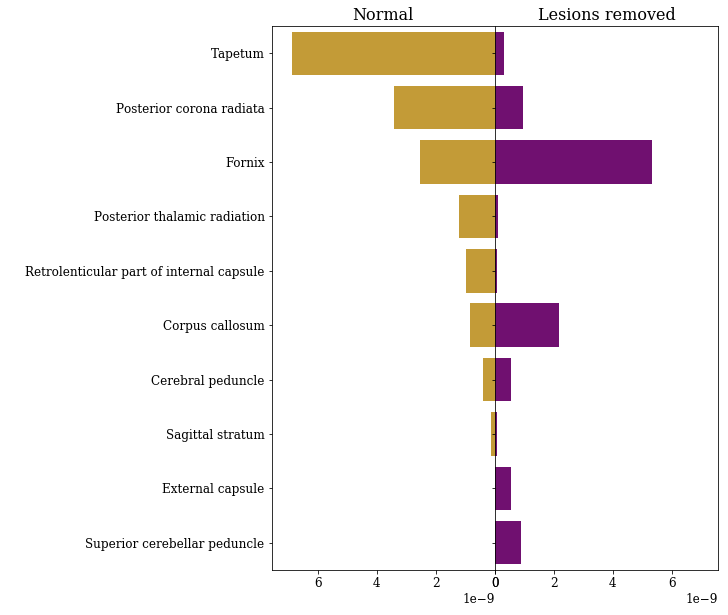

In [73]:
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(8, 10),
                         gridspec_kw = {'wspace':0, 'hspace':10.})
sns.barplot(y=short_df_norm['area'], x=short_df_norm['relevance_normal_scans'], color='goldenrod', ax=axes[0])
axes[0].set_xlabel(' ')
axes[0].set_ylabel(' ')
axes[0].set_xlim(np.max(short_df_norm['relevance_normal_scans'])*1.1, 0)
axes[0].set_title("Normal")


sns.barplot(y=short_df_norm['area'], x=short_df_norm['relevance_lesions_removed'], color='purple', ax=axes[1])
axes[1].set_xlabel(' ')
axes[1].set_ylabel(' ')
axes[1].set_xlim(0, np.max(short_df_norm['relevance_normal_scans'])*1.1)
axes[1].set_title("Lesions removed")

plt.tight_layout()
plt.show()

# Absolute Values 

In [124]:
from matplotlib.ticker import ScalarFormatter 

In [234]:
path = "/analysis/ritter/projects/MS/interm_results"
normal_scans_abs = pd.read_csv(os.path.join(path, "evidence_in_area-absolute-TP-normal_images.csv"))
lesions_removed_abs = pd.read_csv(os.path.join(path, "evidence_in_area-absolute-TP-lesions_removed.csv"))

In [235]:
df_abs = pd.merge(normal_scans_abs, lesions_removed_abs, left_on='area',right_on='area',how='outer', suffixes=('_normal_scans', '_lesions_removed'))

In [236]:
#df_abs = df_abs[::-1]

In [237]:
# get order based on relevance sum
order_abs = (df_abs["relevance_normal_scans"] + df_abs["relevance_lesions_removed"]).sort_values().index

In [238]:
order_abs

Int64Index([2, 7, 0, 1, 5, 3, 9, 11, 10, 12, 8, 13, 6, 14, 4, 15, 17, 18, 19,
            16, 21, 20],
           dtype='int64')

In [239]:
df_abs

,area,relevance_normal_scans,relevance_lesions_removed
0,Superior corona radiata,-4.502492e-07,-1.237157e-07
1,Anterior corona radiata,-3.835404e-07,1.508069e-07
2,Posterior limb of internal capsule,-2.119942e-07,-3.995845e-07
3,Superior fronto-occipital fasciculus,-1.835087e-07,-2.278239e-08
4,External capsule,-1.435867e-07,4.153478e-07
5,Anterior limb of internal capsule,-1.369011e-07,-8.343442e-08
6,Superior cerebellar peduncle,-8.481928e-08,1.315282e-07
7,Middle cerebellar peduncle,-7.678168e-08,-5.212003e-07
8,Cingulum,-5.849164e-08,5.559596e-08
9,Inferior cerebellar peduncle,-3.525672e-08,-8.346326e-09


In [240]:
relevance_normal_max = df_abs["relevance_normal_scans"].max()
relevance_removed_max = df_abs["relevance_lesions_removed"].max()

relevance_normal_sum = df_abs["relevance_normal_scans"][df_abs["relevance_normal_scans"]>0].sum()
relevance_removed_sum = df_abs["relevance_lesions_removed"][df_abs["relevance_lesions_removed"]>0].sum()
#relevance_normal_sum = df_abs["relevance_normal_scans"].sum()
#relevance_removed_sum = df_abs["relevance_lesions_removed"].sum()

In [241]:
# normalize by experiment (left and right)
normalize_side = False
if normalize_side:
    df_abs["relevance_normal_scans"] /= relevance_normal_sum
    df_abs["relevance_lesions_removed"] /= relevance_removed_sum

In [242]:
# take top 10
short_df_abs = df_abs.loc[list(order_abs)].drop(order_abs[:12])
short_df_abs = short_df_abs[::-1]

In [243]:
(0, np.max(short_df_abs['relevance_lesions_removed'])*1.1)

(0, 4.314978991034836e-06)

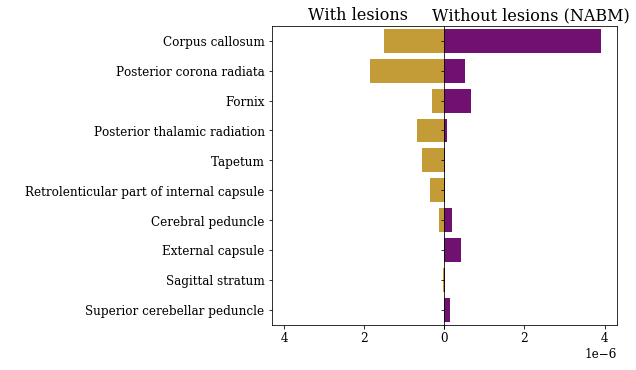

In [244]:
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(12, 5.5),
                         gridspec_kw = {'wspace':0, 'hspace':10.})
sns.barplot(y=short_df_abs['area'], x=short_df_abs['relevance_normal_scans'], color='goldenrod', ax=axes[0])
axes[0].set_xlabel(' ')
axes[0].set_ylabel(' ')
axes[0].set_xlim(np.max(short_df_abs['relevance_lesions_removed'])*1.1, 0)
axes[0].set_title("With lesions")
axes[0].xaxis.set_major_formatter(ScalarFormatter())
axes[0].ticklabel_format(axis='x', style='sci', scilimits=(0,0))
# hide scientific notation exponent in left half
axes[0].xaxis.get_offset_text().set_visible(False)

sns.barplot(y=short_df_abs['area'], x=short_df_abs['relevance_lesions_removed'], color='purple', ax=axes[1])
axes[1].set_xlabel(' ')
axes[1].set_ylabel(' ')
axes[1].set_xlim(0, np.max(short_df_abs['relevance_lesions_removed'])*1.1)
axes[1].set_title("Without lesions (NABM)")
axes[1].xaxis.set_major_formatter(ScalarFormatter())
axes[1].ticklabel_format(axis='x', style='sci', scilimits=(0,0))
# hide duplicate 0 xtick
axes[1].xaxis.get_major_ticks()[0].label1.set_visible(False)

#plt.tight_layout()
plt.subplots_adjust(left=0.3, right=0.7)
file_path = os.path.join(image_file_dir, "lesion_removal_comparison_absolute.png")
#plt.savefig(file_path, format='png', transparent=True)#, bbox_inches='tight')
plt.show()